In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_pickle("../data/processed/train_FD001_processed.pkl")

In [5]:
# Max cycle for each engine
max_cycles = df.groupby('engine_id')['cycle'].max()

In [6]:
# Merge max cycle back into the dataframe
df = df.merge(max_cycles.rename('max_cycle'), on='engine_id')

In [7]:
# Calculate RUL
df['RUL'] = df['max_cycle'] - df['cycle']

In [8]:
df[['engine_id','cycle','max_cycle','RUL']].head(10)

,engine_id,cycle,max_cycle,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187
5,1,6,192,186
6,1,7,192,185
7,1,8,192,184
8,1,9,192,183
9,1,10,192,182


In [9]:
engine_1 = df[df['engine_id'] == 1]

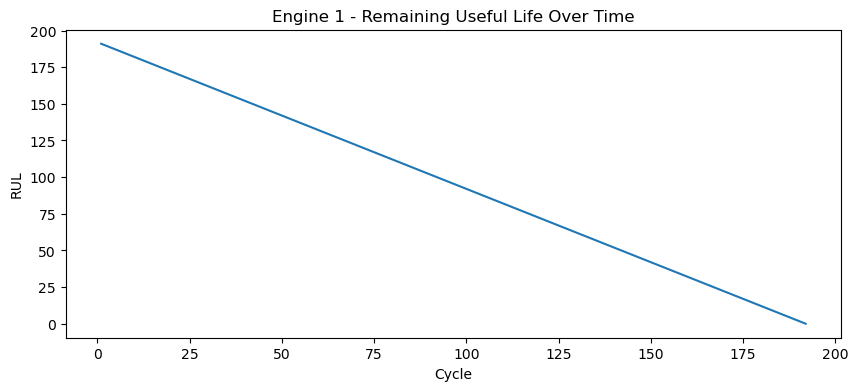

In [10]:
plt.figure(figsize=(10,4))
plt.plot(engine_1['cycle'], engine_1['RUL'])
plt.title("Engine 1 - Remaining Useful Life Over Time")
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.show()

In [11]:
df = df.sort_values(['engine_id','cycle'])

In [12]:
window = 5

for sensor in [f"sensor_{i}" for i in range(1,22)]:
    df[f"{sensor}_rolling_mean"] = df.groupby('engine_id')[sensor].rolling(window).mean().reset_index(0, drop=True)

In [13]:
# How fast sensors are changing
for sensor in [f"sensor_{i}" for i in range(1,22)]:
    df[f"{sensor}_delta"] = df.groupby('engine_id')[sensor].diff()

In [14]:
# Drop the first few rows (rolling window creates NaNs)
df = df.dropna().reset_index(drop=True)

In [15]:
df.to_pickle("../data/processed/train_FD001_processed.pkl")